## Imported libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

# Handling missing values
import missingno as msno

# Advanced Visualization
import plotly.express as px
import plotly.graph_objects as go 

# Interactive Notebooks
%matplotlib inline
from IPython.display import display 

## Data Loading
In this step, we load our dataset into a pandas DataFrame to further explore and analyze it.


In [2]:
data = pd.read_csv('../Data/Raw/Amazon Sale Report.csv')

C:\Users\athar\AppData\Local\Temp\ipykernel_5292\1994686366.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/Raw/Amazon Sale Report.csv')


In [3]:
data.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI   TAMIL NADU   

  ship-postal-code  ship-country  \
0         400081.0            IN   
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   

                                       promotion-ids    B2B  fulfilled-by  \
0                                                NaN  False     Easy Ship   
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

In [4]:
missing_values_count = data.isnull().sum()
missing_values_count

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [5]:
data.shape

(128975, 24)

<Axes: >

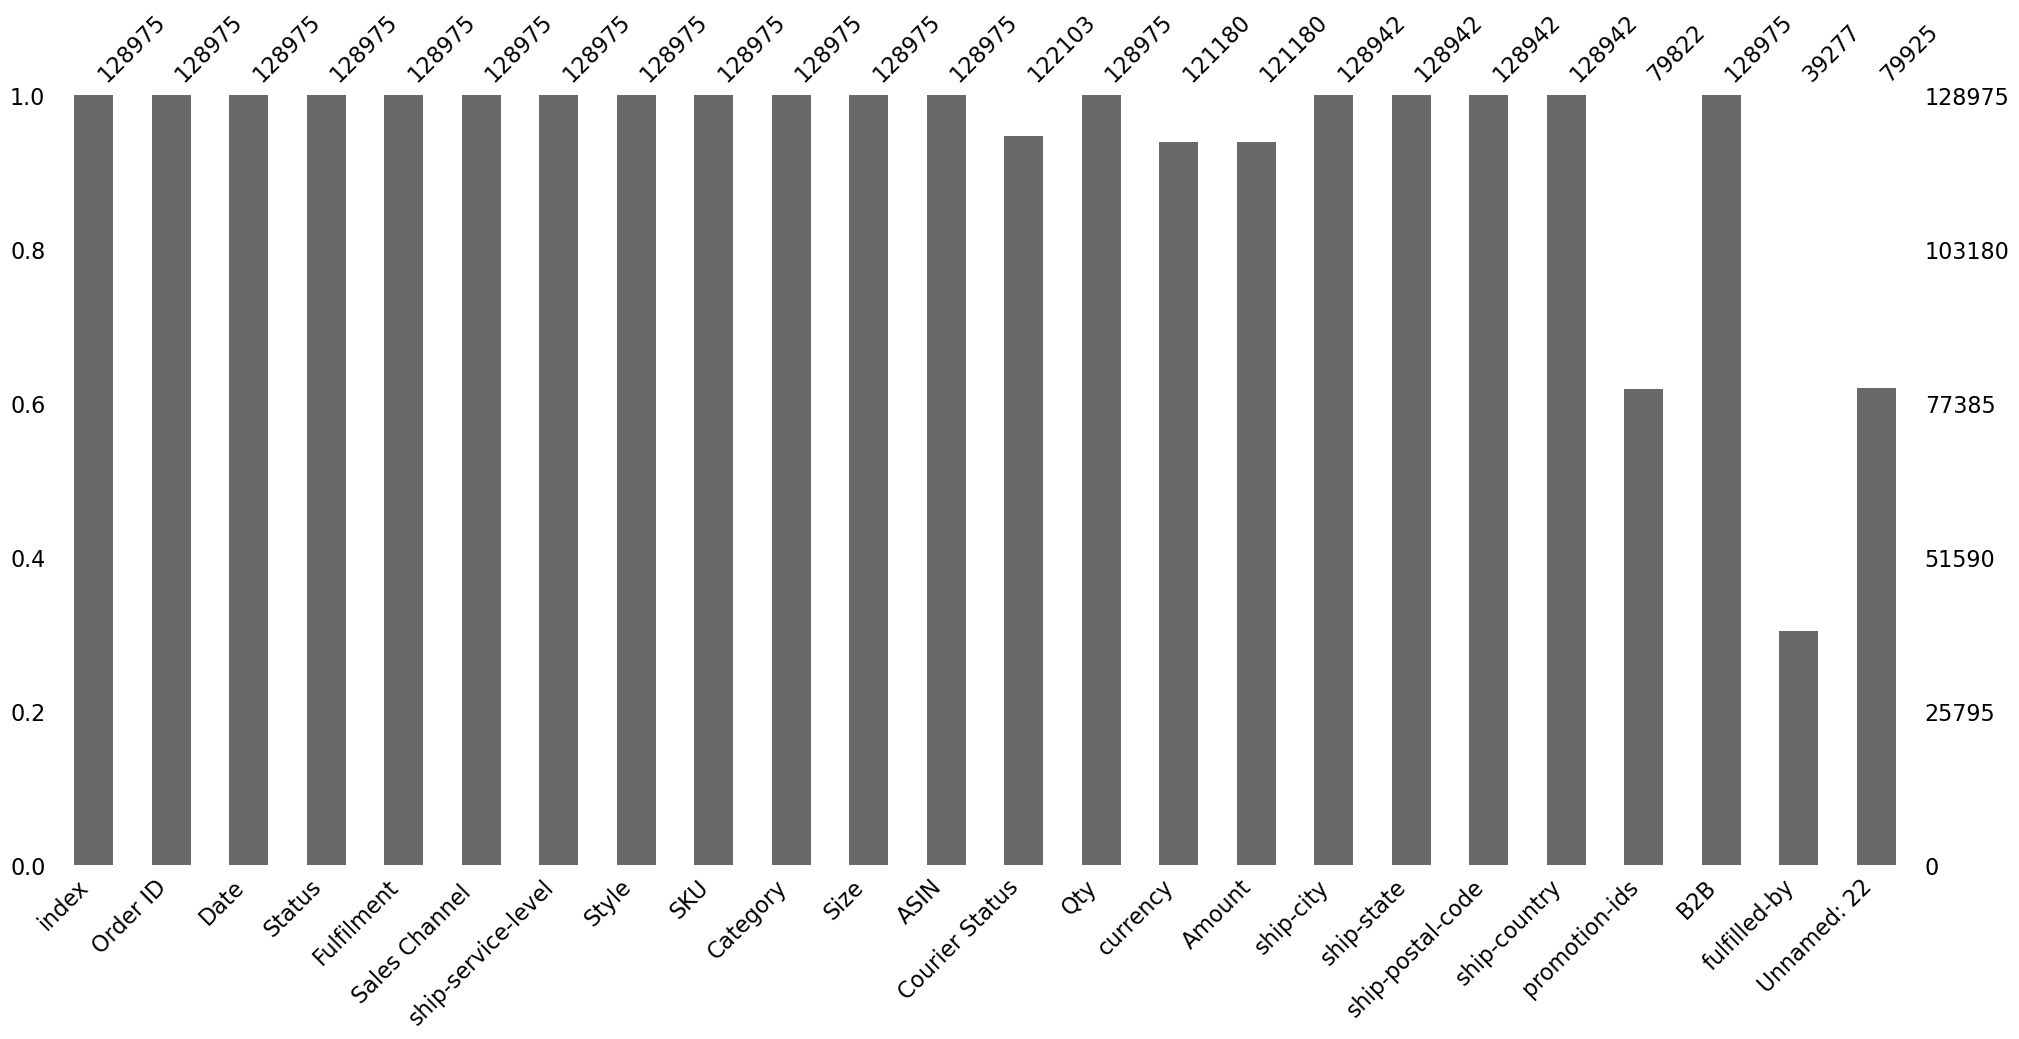

In [6]:
msno.bar(data)

In [7]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
missing_percentage_total = (total_missing / total_cells) * 100
print(f"Percentage of missing data in the dataset: {missing_percentage_total:.2f}%")


Percentage of missing data in the dataset: 6.80%


In [8]:
data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [9]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(data[i].value_counts())
        print()
        print()

Order ID

the values are:
Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
402-2493916-3621929     1
408-7436540-8728312     1
Name: count, Length: 120378, dtype: int64


Date

the values are:
Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
            ... 
06-23-22    1090
06-24-22    1028
06-25-22    1026
06-29-22     658
03-31-22     171
Name: count, Length: 91, dtype: int64


Status

the values are:
Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35

Dropping unwanted columns: `Unnamed: 22`, `promotion-ids`, `fulfilled by`

If the `Unnamed: 22` column isn't providing any meaningful insights for your analysis or objectives and you're not anticipating filling it with accurate data in the future, dropping it could be a wise choice. A column with entirely artificial or placeholder values can be misleading and might not add any value to your analysis. So we're dropping the `Unnamed: 22` column

In [10]:
data.drop('Unnamed: 22', axis=1, inplace=True)

In [11]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [12]:
data.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... Qty currency  Amount    ship-city   ship-state  \
0            Set  ...   0      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...   1      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...   1      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...   0      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...   1      INR  574.00      CHENNAI   TAMIL NADU   

   ship-postal-code ship-country  \
0          400081.0           IN   
1          560085.0           IN   
2          410210.0           IN   
3          605008.0           IN   
4          600073.0           IN   

                                       promotion-ids    B2B fulfilled-by  
0                                                NaN  False    Easy Ship  
1  Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship  
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN  
3                                                NaN  False    Easy Ship  
4                                                NaN  False          NaN  

[5 rows x 23 columns]

In [13]:
data.drop('promotion-ids', axis=1, inplace=True)

In [14]:
data.drop('fulfilled-by', axis=1, inplace=True)

In [15]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [16]:
data.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
B2B                      0
dtype: int64

### Handling missing values

In [17]:
data['Courier Status'].fillna('Not Available', inplace=True)

In [18]:
data['Courier Status'].isnull().sum()

0

In [19]:
data['currency'].fillna(data['currency'].mode()[0], inplace=True)

In [20]:
data['currency'].isnull().sum()

0

In [21]:
data['Amount'].fillna(data['Amount'].mean(), inplace=True)

In [22]:
data['Amount'].isnull().sum()

0

In [23]:
address_cols = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for col in address_cols:
    data[col] = data[col].astype(str)
    data[col].fillna('Unknown', inplace=True)

In [24]:
data[address_cols].isnull().sum()

ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
dtype: int64

As you can see that we've taken care of all the missing values in the dataset

In [25]:
data.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

### Data transformation and feature engineering

In [26]:
data.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ...        ASIN Courier Status Qty  currency  Amount  \
0            Set  ...  B09KXVBD7Z  Not Available   0       INR  647.62   
1          kurta  ...  B09K3WFS32        Shipped   1       INR  406.00   
2          kurta  ...  B07WV4JV4D        Shipped   1       INR  329.00   
3  Western Dress  ...  B099NRCT7B  Not Available   0       INR  753.33   
4            Top  ...  B098714BZP        Shipped   1       INR  574.00   

     ship-city   ship-state ship-postal-code ship-country    B2B  
0       MUMBAI  MAHARASHTRA         400081.0           IN  False  
1    BENGALURU    KARNATAKA         560085.0           IN  False  
2  NAVI MUMBAI  MAHARASHTRA         410210.0           IN   True  
3   PUDUCHERRY   PUDUCHERRY         605008.0           IN  False  
4      CHENNAI   TAMIL NADU         600073.0           IN  False  

[5 rows x 21 columns]

converting `Date` from datetime column

In [27]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\athar\AppData\Local\Temp\ipykernel_5292\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [28]:
data['Date']

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 128975, dtype: datetime64[ns]

Create features like `month, day, year, and day_of_week` from the Date column, which might be useful for further analysis.

In [29]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data['day_of_week'] = data['Date'].dt.dayofweek

In [30]:
data.head()

index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ...  Amount    ship-city   ship-state  ship-postal-code  \
0            Set  ...  647.62       MUMBAI  MAHARASHTRA          400081.0   
1          kurta  ...  406.00    BENGALURU    KARNATAKA          560085.0   
2          kurta  ...  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3  Western Dress  ...  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4            Top  ...  574.00      CHENNAI   TAMIL NADU          600073.0   

  ship-country    B2B Month Day  Year day_of_week  
0           IN  False     4  30  2022           5  
1           IN  False     4  30  2022           5  
2           IN   True     4  30  2022           5  
3           IN  False     4  30  2022           5  
4           IN  False     4  30  2022           5  

[5 rows x 25 columns]

Checking for duplicates

In [31]:
data.drop_duplicates(inplace=True)

In [32]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week'],
      dtype='object')

In [33]:
data['Category'].value_counts()

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

In [34]:
data['Category'] = data['Category'].str.lower()

In [35]:
data['Category'].value_counts()

Category
set              50284
kurta            49877
western dress    15500
top              10622
ethnic dress      1159
blouse             926
bottom             440
saree              164
dupatta              3
Name: count, dtype: int64

In [36]:
data.drop('index', axis=1, inplace=True)

In [37]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week'],
      dtype='object')

In [38]:
# Create a new column for individual transaction sales
data['Total_Sales'] = data['Qty'] * data['Amount']

# Calculate the total sales across all transactions
total_sales = data['Total_Sales'].sum()
print(f'Total Sales: {total_sales:.2f}')


Total Sales: 76142715.76


In [39]:
data.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  western dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            top   

  Size  ...    ship-city   ship-state  ship-postal-code ship-country    B2B  \
0    S  ...       MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  3XL  ...    BENGALURU    KARNATAKA          560085.0           IN  False   
2   XL  ...  NAVI MUMBAI  MAHARASHTRA          410210.0           IN   True   
3    L  ...   PUDUCHERRY   PUDUCHERRY          605008.0           IN  False   
4  3XL  ...      CHENNAI   TAMIL NADU          600073.0           IN  False   

  Month Day  Year day_of_week  Total_Sales  
0     4  30  2022           5          0.0  
1     4  30  2022           5        406.0  
2     4  30  2022           5        329.0  
3     4  30  2022           5          0.0  
4     4  30  2022           5        574.0  

[5 rows x 25 columns]

In [40]:
data.tail()

Order ID       Date   Status Fulfilment Sales Channel   \
128970  406-6001380-7673107 2022-05-31  Shipped     Amazon      Amazon.in   
128971  402-9551604-7544318 2022-05-31  Shipped     Amazon      Amazon.in   
128972  407-9547469-3152358 2022-05-31  Shipped     Amazon      Amazon.in   
128973  402-6184140-0545956 2022-05-31  Shipped     Amazon      Amazon.in   
128974  408-7436540-8728312 2022-05-31  Shipped     Amazon      Amazon.in   

       ship-service-level    Style             SKU       Category Size  ...  \
128970          Expedited  JNE3697   JNE3697-KR-XL          kurta   XL  ...   
128971          Expedited   SET401  SET401-KR-NP-M            set    M  ...   
128972          Expedited    J0157    J0157-DR-XXL  western dress  XXL  ...   
128973          Expedited    J0012    J0012-SKD-XS            set   XS  ...   
128974          Expedited    J0003     J0003-SET-S            set    S  ...   

        ship-city    ship-state  ship-postal-code ship-country    B2B Month  \
128970  HYDERABAD     TELANGANA          500013.0           IN  False     5   
128971   GURUGRAM       HARYANA          122004.0           IN  False     5   
128972  HYDERABAD     TELANGANA          500049.0           IN  False     5   
128973      Halol       Gujarat          389350.0           IN  False     5   
128974     Raipur  CHHATTISGARH          492014.0           IN  False     5   

       Day  Year day_of_week  Total_Sales  
128970  31  2022           1        517.0  
128971  31  2022           1        999.0  
128972  31  2022           1        690.0  
128973  31  2022           1       1199.0  
128974  31  2022           1        696.0  

[5 rows x 25 columns]

## EDA and Visualization

In [41]:
data.describe().transpose()

count                           mean                  min  \
Date           128975  2022-05-12 11:49:27.951928576  2022-03-31 00:00:00   
Qty          128975.0                       0.904431                  0.0   
Amount       128975.0                     648.561465                  0.0   
Month        128975.0                       4.909192                  3.0   
Day          128975.0                      14.925978                  1.0   
Year         128975.0                         2022.0               2022.0   
day_of_week  128975.0                       3.012088                  0.0   
Total_Sales  128975.0                     590.368023                  0.0   

                             25%                  50%                  75%  \
Date         2022-04-20 00:00:00  2022-05-10 00:00:00  2022-06-04 00:00:00   
Qty                          1.0                  1.0                  1.0   
Amount                     459.0                635.0                771.0   
Month                        4.0                  5.0                  6.0   
Day                          7.0                 15.0                 22.0   
Year                      2022.0               2022.0               2022.0   
day_of_week                  1.0                  3.0                  5.0   
Total_Sales                399.0                568.0                771.0   

                             max        std  
Date         2022-06-29 00:00:00        NaN  
Qty                         15.0   0.313354  
Amount                    5584.0  272.58124  
Month                        6.0   0.818402  
Day                         31.0   8.742876  
Year                      2022.0        0.0  
day_of_week                  6.0   2.026397  
Total_Sales              44672.0  388.16159

In [42]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales'],
      dtype='object')

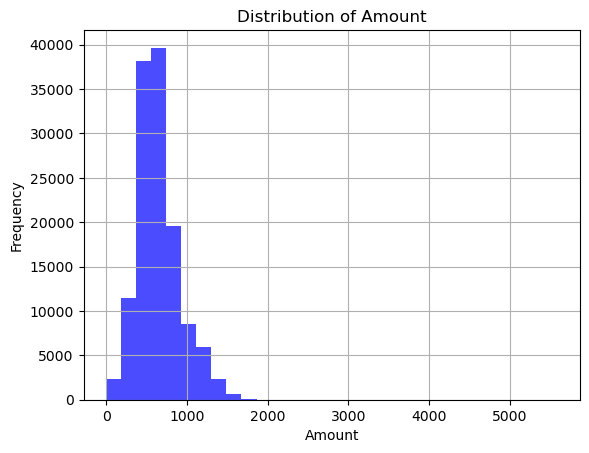

In [67]:
data['Amount'].hist(bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

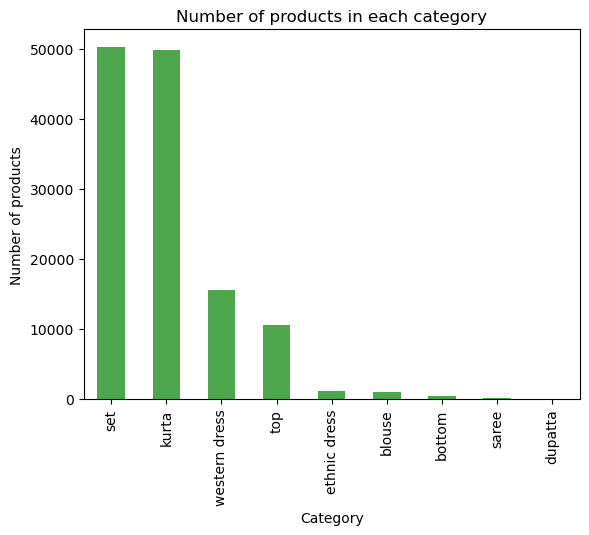

In [44]:
data['Category'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Number of products in each category')
plt.xlabel('Category')
plt.ylabel('Number of products')
plt.show()

c:\Users\athar\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\athar\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\athar\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



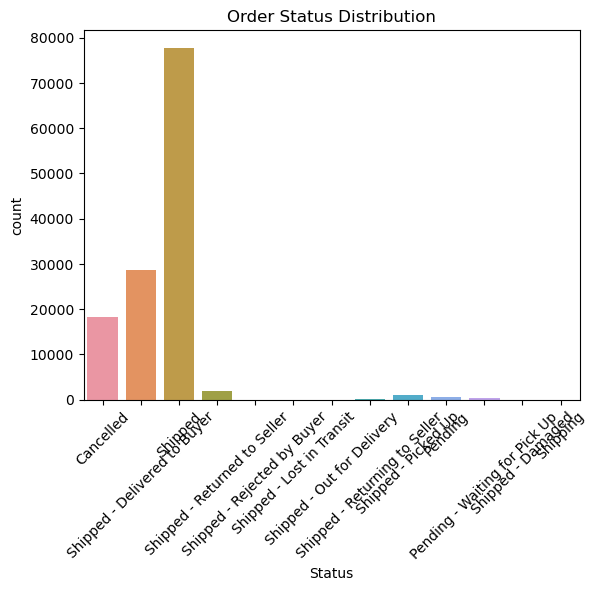

In [46]:
sns.countplot(x='Status', data=data)
plt.xticks(rotation=45)
plt.title('Order Status Distribution')
plt.show()

In [47]:
fig = px.pie(data, names='Status', title='Order Status Distribution')
fig.show()


In [48]:
fig = px.line(data.set_index('Date').resample('D').sum().reset_index(), x="Date", y="Amount", title="Sales Amount over Time")
fig.show()


c:\Users\athar\miniconda3\envs\minimal_ds\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [49]:
fig = px.scatter(data, x="Qty", y="Amount", title="Scatter plot of Quantity vs Amount")
fig.show()


In [50]:
sales_by_category = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

fig = go.Figure(data=[go.Bar(x=sales_by_category['Category'],
                             y=sales_by_category['Amount'],
                             marker_color='rgb(220, 20, 60)')],
                layout_title_text='Sales by Category')
fig.show()


In [51]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales'],
      dtype='object')

In [52]:
data.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  western dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            top   

  Size  ...    ship-city   ship-state  ship-postal-code ship-country    B2B  \
0    S  ...       MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  3XL  ...    BENGALURU    KARNATAKA          560085.0           IN  False   
2   XL  ...  NAVI MUMBAI  MAHARASHTRA          410210.0           IN   True   
3    L  ...   PUDUCHERRY   PUDUCHERRY          605008.0           IN  False   
4  3XL  ...      CHENNAI   TAMIL NADU          600073.0           IN  False   

  Month Day  Year day_of_week  Total_Sales  
0     4  30  2022           5          0.0  
1     4  30  2022           5        406.0  
2     4  30  2022           5        329.0  
3     4  30  2022           5          0.0  
4     4  30  2022           5        574.0  

[5 rows x 25 columns]

In [53]:
data.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  western dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            top   

  Size  ...    ship-city   ship-state  ship-postal-code ship-country    B2B  \
0    S  ...       MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  3XL  ...    BENGALURU    KARNATAKA          560085.0           IN  False   
2   XL  ...  NAVI MUMBAI  MAHARASHTRA          410210.0           IN   True   
3    L  ...   PUDUCHERRY   PUDUCHERRY          605008.0           IN  False   
4  3XL  ...      CHENNAI   TAMIL NADU          600073.0           IN  False   

  Month Day  Year day_of_week  Total_Sales  
0     4  30  2022           5          0.0  
1     4  30  2022           5        406.0  
2     4  30  2022           5        329.0  
3     4  30  2022           5          0.0  
4     4  30  2022           5        574.0  

[5 rows x 25 columns]

In [54]:
data['Is_Weekend'] = data['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [55]:
data['Is_Weekend'] = data['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

In [56]:
data.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  western dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            top   

  Size  ...   ship-state ship-postal-code  ship-country    B2B  Month Day  \
0    S  ...  MAHARASHTRA         400081.0            IN  False      4  30   
1  3XL  ...    KARNATAKA         560085.0            IN  False      4  30   
2   XL  ...  MAHARASHTRA         410210.0            IN   True      4  30   
3    L  ...   PUDUCHERRY         605008.0            IN  False      4  30   
4  3XL  ...   TAMIL NADU         600073.0            IN  False      4  30   

   Year day_of_week Total_Sales  Is_Weekend  
0  2022           5         0.0           1  
1  2022           5       406.0           1  
2  2022           5       329.0           1  
3  2022           5         0.0           1  
4  2022           5       574.0           1  

[5 rows x 26 columns]

In [57]:
avg_order_weekend = data.groupby('Is_Weekend')['Total_Sales'].mean().reset_index()
avg_order_weekend['Day_Type'] = avg_order_weekend['Is_Weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')

fig = px.bar(avg_order_weekend, x='Day_Type', y='Total_Sales', title='Average Order Value: Weekdays vs. Weekends')
fig.show()


In [58]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

In [59]:
# Group by ship-service-level and sum up the sales
service_level_dist = data.groupby('ship-service-level')['Total_Sales'].sum().reset_index()

# Plotting
fig = px.pie(service_level_dist, names='ship-service-level', values='Total_Sales', title='Sales Distribution by Ship Service Level')
fig.show()


In [60]:
# Number of top cities to visualize
N = 10

# Group by ship-city and sum up the sales
city_sales = data.groupby('ship-city')['Total_Sales'].sum().reset_index()

# Sort the cities by sales and pick the top N
top_cities = city_sales.sort_values(by='Total_Sales', ascending=False).head(N)

# Plotting
fig = px.bar(top_cities, x='ship-city', y='Total_Sales', title=f'Top {N} Cities by Sales', color_discrete_sequence=['orange'])
fig.show()


In [61]:
data.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  western dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            top   

  Size  ...   ship-state ship-postal-code  ship-country    B2B  Month Day  \
0    S  ...  MAHARASHTRA         400081.0            IN  False      4  30   
1  3XL  ...    KARNATAKA         560085.0            IN  False      4  30   
2   XL  ...  MAHARASHTRA         410210.0            IN   True      4  30   
3    L  ...   PUDUCHERRY         605008.0            IN  False      4  30   
4  3XL  ...   TAMIL NADU         600073.0            IN  False      4  30   

   Year day_of_week Total_Sales  Is_Weekend  
0  2022           5         0.0           1  
1  2022           5       406.0           1  
2  2022           5       329.0           1  
3  2022           5         0.0           1  
4  2022           5       574.0           1  

[5 rows x 26 columns]

In [62]:
fulfilment_counts = data['Fulfilment'].value_counts().reset_index()
fulfilment_counts.columns = ['Fulfilment', 'Count']

# Plotting
fig = px.bar(fulfilment_counts, x='Fulfilment', y='Count', title='Distribution of Fulfilment Types',
             color_discrete_sequence=['#2B3A67'])  # Set color as desired

fig.show()

In [63]:
size_counts = data['Size'].value_counts().reset_index()
size_counts.columns = ['Size', 'Count']

# Plotting
fig = px.bar(size_counts, x='Size', y='Count', title='Distribution of Sizes',
             color_discrete_sequence=['#56CCF2'])  # Set color as desired

fig.show()

In [64]:
data.to_csv('../Data/Processed/cleaned_sales_data.csv', index=False)